데이터 불러오기, 필요한 페키지 설치 및 임포트,데이터 전처리

In [1]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 의사결정 나무 시각화를 위한 graphviz 설치 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bion

In [3]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 737 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 50.1 MB/s 
     |████████████████████████████████| 98 kB 4.6 MB/s 
     |████████████████████████████████| 8.8 MB 55.3 MB/s 
     |████████████████████████████████| 468 kB 65.0 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42033 sha256=4ecb1b3e7bdecc26a13dbcf351e84d6c28fe00427993940b864238cffbcd6d3f
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [4]:
 !pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip3 install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 26.9 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=b10841ce10b2778179adebc7a8458233d2db865f97f680471698774da56d21c4
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [6]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import MeanShift,estimate_bandwidth
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [52]:
market_df = pd.read_csv('/content/marketing_campaign.csv',sep = '\t')
new_data = market_df.drop(['Education', 'Marital_Status','Dt_Customer','ID'],axis = 1)
new_data = new_data.dropna()
new_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0


In [53]:
# 출생 데이터는 나이로 변환
def func3(x) :
    return 2023 - x
new_data['age'] = new_data['Year_Birth'].apply(lambda x : func3(x))
new_data = new_data.drop('Year_Birth',axis=1)
new_data = new_data[new_data['age']<100]

In [54]:
new_data = new_data[new_data['Income'] <= 100000]

In [55]:
# 프로모션 참여횟수로 변환
new_data['promotion_num'] = new_data['AcceptedCmp1']+new_data['AcceptedCmp2']+new_data['AcceptedCmp3']+new_data['AcceptedCmp4']+new_data['AcceptedCmp5']+new_data['Response']
new_data=new_data.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1)

In [56]:
new_data = new_data.drop(['Z_CostContact', 'Z_Revenue'],axis = 1)

In [61]:
def remove_out_mine(df,remove_col):
  dff = df.copy()
  q1 = remove_col.quantile(0.25)
  q3 = remove_col.quantile(0.75)
  iqr = q3 - q1
  name = remove_col.name
  dff = dff[(dff[name] <= (q3 +1.5*iqr)) & (dff[name]>=(q1 - 1.5*iqr))]
  dff = dff.reset_index(drop = True)
  return dff

In [57]:
remove_outlier_data = new_data.copy()
for i in range(18):
  if((remove_outlier_data.columns[i] == 'Marital_Status_num') | (remove_outlier_data.columns[i] == 'Education_num') | (remove_outlier_data.columns[i] == 'Complain') | (remove_outlier_data.columns[i] == 'promotion_num')) :
    continue
  remove_outlier_data = remove_out_mine(remove_outlier_data,remove_outlier_data[remove_outlier_data.columns[i]])

In [58]:
# 데이터 정리
dr_df = remove_outlier_data.copy()
dr_df['Mnt'] = dr_df["MntWines"] + dr_df["MntFruits"] +dr_df["MntMeatProducts"] + dr_df["MntFishProducts"] + dr_df["MntSweetProducts"] + dr_df["MntGoldProds"]
dr_df["Purchases"] = dr_df["NumDealsPurchases"] +dr_df["NumWebPurchases"] +dr_df["NumCatalogPurchases"] +dr_df["NumStorePurchases"]
dr_df["Child"] = dr_df["Kidhome"] + dr_df["Teenhome"]
dr_df = dr_df.drop(["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Kidhome","Teenhome","Complain","NumWebVisitsMonth","promotion_num"], axis =1)

In [15]:
dr_df.head()

,Income,Recency,age,Mnt,Purchases,Child
0,46344.0,38,69,27,6,2
1,26646.0,26,39,53,8,1
2,33454.0,32,38,169,10,1
3,30351.0,19,49,46,6,1
4,7500.0,59,47,61,6,0


In [16]:
def get_silhouette_score(df):
  name = df.columns[len(df.columns)- 1]
  if sum(df[name]) == 0 :
    print("그룹이 한개만 존재합니다")
    return
  df=df.dropna()
  df_copy = df.copy()
  print(name)
  df_copy['silhouette_coeff'] = silhouette_samples(df,df[name])
  print("그룹별 실루엣 점수")
  print(df_copy.groupby(name)['silhouette_coeff'].mean())
  print("전체 실루엣 평균")
  print(df_copy.groupby(name)['silhouette_coeff'].mean().mean())
  return df_copy

In [17]:
def kmeans_mine(df,n):
  kmeans = KMeans(n_clusters = n, init='k-means++', max_iter=3000,random_state=320)
  kmeans.fit(df)
  df_copy = df.copy()
  df_copy['kmeans'] = pd.DataFrame(kmeans.labels_)
  print("그룹별 데이터 수")
  print(df_copy.groupby('kmeans').size())
  return df_copy

In [18]:
def ms_mine(df):
  bw = estimate_bandwidth(df)
  ms = MeanShift(bandwidth=bw)
  ms_clust = ms.fit_predict(df)
  df_copy = df.copy()
  df_copy['ms'] = ms_clust
  print("그룹별 데이터 수")
  print(df_copy.groupby('ms').size())
  return df_copy

In [19]:
def get_accuracy(trained_model,X_test,y_test):
  a = trained_model.predict(X_test)
  accuracy = accuracy_score(y_test,a)
  print(accuracy)

# 1.데이터 군집화 후 분류분석을 통한 중요변수 선택

### 1-1 kmeans

In [20]:
for i in range(2,15):
  tmp = kmeans_mine(dr_df,i)
  tmp2 = get_silhouette_score(tmp)

그룹별 데이터 수
kmeans
0    511
1    460
dtype: int64
kmeans
그룹별 실루엣 점수
kmeans
0    0.564397
1    0.540268
Name: silhouette_coeff, dtype: float64
전체 실루엣 평균
0.5523324822933611
그룹별 데이터 수
kmeans
0    317
1    431
2    223
dtype: int64
kmeans
그룹별 실루엣 점수
kmeans
0    0.559895
1    0.551070
2    0.520564
Name: silhouette_coeff, dtype: float64
전체 실루엣 평균
0.5438429254830405
그룹별 데이터 수
kmeans
0    131
1    328
2    287
3    225
dtype: int64
kmeans
그룹별 실루엣 점수
kmeans
0    0.504705
1    0.507662
2    0.526626
3    0.549090
Name: silhouette_coeff, dtype: float64
전체 실루엣 평균
0.5220208665386686
그룹별 데이터 수
kmeans
0    256
1    205
2     80
3    135
4    295
dtype: int64
kmeans
그룹별 실루엣 점수
kmeans
0    0.498878
1    0.530096
2    0.496760
3    0.542143
4    0.543247
Name: silhouette_coeff, dtype: float64
전체 실루엣 평균
0.5222249488300144
그룹별 데이터 수
kmeans
0    108
1    224
2     70
3    220
4    158
5    191
dtype: int64
kmeans
그룹별 실루엣 점수
kmeans
0    0.494458
1    0.508079
2    0.462877
3    0.525045
4    0.540228
5    0.

n = 2 일 때 성능이 가장 좋으므로 2를 선택

In [21]:
df_kmeans = kmeans_mine(remove_outlier_data,2)
df_kmeans = get_silhouette_score(df_kmeans)

그룹별 데이터 수
kmeans
0    511
1    460
dtype: int64
kmeans
그룹별 실루엣 점수
kmeans
0    0.564422
1    0.540354
Name: silhouette_coeff, dtype: float64
전체 실루엣 평균
0.5523882679766606


###1-2 평균 이동군집

In [22]:
df_ms = ms_mine(dr_df)
df_ms = get_silhouette_score(df_ms)

그룹별 데이터 수
ms
0    951
1     20
dtype: int64
ms
그룹별 실루엣 점수
ms
0    0.514592
1    0.838190
Name: silhouette_coeff, dtype: float64
전체 실루엣 평균
0.6763908180274525


In [60]:
#gmm 시도
list = []
gmm = GaussianMixture(n_components=2, random_state=320)
gmm.fit(dr_df)
gmm_cluster_labels = gmm.predict(dr_df)
df_gmm=dr_df.copy()
df_gmm['gmm']=gmm_cluster_labels
df_gmm=get_silhouette_score(df_gmm)



gmm
그룹별 실루엣 점수
gmm
0    0.380190
1    0.447589
Name: silhouette_coeff, dtype: float64
전체 실루엣 평균
0.41388955723120424


평균 이동군집의 성능이 더 좋게 나왔으므로 평균 이동군집의 데이터를 최종 군집데이터로 선택

In [24]:
fin_df = df_ms.drop('silhouette_coeff',axis=1)

###1-3 데이터 나누기

In [25]:
X = fin_df[fin_df.columns[0:6]]
y = fin_df['ms']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=320)

###1-4 데이터 리샘플링

데이터가 불균형이므로 SMOTE, ADASYN, SMOTE-TOMEK등의 방법으로 데이터 리샘플링

In [26]:
##SMOTE-TOMEK

smotetomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),random_state=320)
X_smtomek, y_smtomek = smotetomek.fit_resample(X_train, y_train)

In [27]:
data_for_see = pd.DataFrame(X_smtomek, y_smtomek)
data_for_see.groupby('ms').size()

ms
0    663
1    663
dtype: int64

###1-5 분류분석

앞서 구한 리샘플링 데이터를 여러 분류분석 모델에 대입하면서 가장 영향력이 큰 변수를 찾을것임 

####1-5-1 의사결정 나무

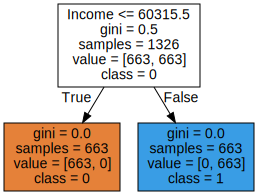

In [28]:
##SMOTE-TOMEK
smtomek_decision_tree = tree.DecisionTreeClassifier(random_state=320)
smtomek_decision_tree = smtomek_decision_tree.fit(X_smtomek,y_smtomek)
export_graphviz(smtomek_decision_tree, out_file="SMOTE_TOMEK_dtree.dot", class_names=['0','1'], \
               feature_names = X_smtomek.columns, impurity=True, filled=True)
               

with open("SMOTE_TOMEK_dtree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

오버 샘플링 기법과 관계없이 의사결정 나무의 경우 Income변수만으로 모든 데이터를 완벽하게 구분함
이를 실제 테스트 데이터에 대해서도 적절한지 구해볼 필요가 있

In [29]:
##테스트 데이터에 정확도 평가
print('SMOTE-TOMEK 정확도')
get_accuracy(smtomek_decision_tree,X_test,y_test)

SMOTE-TOMEK 정확도
1.0


모든 샘플링 기법에 대해 의사결정나무의 정확도가 1을 나타냄. 즉 Income변수가 아주 중요한 변수로 작용함


####1-5-2 로지스틱 회귀분석 

In [30]:
#분석 전 정규화 처리
#가장 성능이 좋다고 알려진 SMOTE-TOMEK이용해서 진행 
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_smtomek)
X_test_sc = scaler.transform(X_test)

In [31]:
model = LogisticRegression()
model.fit(X_train_sc, y_smtomek)

LogisticRegression()

In [32]:
print(model.score(X_test_sc,y_test))

0.9897260273972602


거의 100% 에 가까운 정확도를 보이고 있다.<br>
이제 가장 중요한 변수를 탐색하면 다음과 같다.

In [33]:
feature_importance_lr = pd.DataFrame(zip(X_train.columns.values, model.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)
feature_importance_lr

,feature,coef
0,Income,7.669798
3,Mnt,1.151814
1,Recency,1.037868
2,age,-0.029577
4,Purchases,-0.215739
5,Child,-0.478963


의사결정 나무에서 Income변수만을 사용한것과는 달리 모든 변수를 사용한것을 확인할 수 있다. <br>그럼에도 가장 중요한 변수로 Income이 선택된것을 확인할 수 있다. <br>그 밖에도 Mnt 변수도 어느정도 중요도를 가지고 있는것을 확인할 수 있다. 

####1-5-3 XGBoost

In [34]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 320)
model.fit(X_smtomek,y_smtomek)

XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=500,
              random_state=320)

In [35]:
get_accuracy(model,X_test,y_test)

1.0


 의사결정 나무와 마찬가지로 테스트 데이터에 대한 예측결과가 1로 전부 정확하게 분류한것을 확인할 수 있다. <br>이제 변수(특성)의 중요도를 알아보면 다음과 같다.

In [36]:
feature_importance = pd.DataFrame(model.feature_importances_.reshape((1, -1)), columns=X_train.columns, index=['feature_importance'])
feature_importance

,Income,Recency,age,Mnt,Purchases,Child
feature_importance,1.0,0.0,0.0,0.0,0.0,0.0


의사결정 나무와 같은 결과를 나타내고 있는것이 확인이 가능하다.

  3개의 분류분석 결과를 확인해 보면 Income 변수가 가장 중요한것으로 판단 되었고 심지어 의사결정 나무와 XGBoost 모델은 Income변수 한가지만으로 분류를 완벽하게 하는 모습을 보였다. 로지스틱 회귀분석의 경우 모델의 특성(가정상)상 모든 변수를 사용하기 때문에 다른 변수의 중요도 까지 나타나게 되었고, 그 결과로 가장 중요한 변수는 Income이지만 Mnt관련 변수와 Recency변수가 어느정도 중요도를 갖는것을 파악할 수 있었다.

In [37]:
print("0번 그룹 Income의 최대값",df_ms[df_ms['ms']==0]["Income"].max())
print("1번 그룹 Income의 최솟값",df_ms[df_ms['ms']==1]["Income"].min())

0번 그룹 Income의 최대값 60199.0
1번 그룹 Income의 최솟값 60432.0


Income변수만으로 정확하게 두 그룹으로 나누어졌다. 고객의 관리에 있어 Income값의 기준을 60200~60400 정도로 산정하고 관리하는것이 합리적이라 판단된다.

In [38]:
fin_df.groupby("ms").mean()

,Income,Recency,age,Mnt,Purchases,Child
ms,,,,,,
0,33928.497371,48.797056,51.615142,88.388013,7.759201,1.266036
1,65186.500000,57.950000,57.600000,268.100000,11.900000,1.400000


두 집단의 각 변수에 대한 평균값을 비교해 보면 확실히 앞서 차이가 났던 Income 변수와 로지스틱 회귀분석에서 중요하다고 판단 되었던 Mnt변수까지도 확실한 차이가 보인다..

###1-6 차원 축소 후 분석

앞서 군집화를 통해 가장 중요하게 군집을 구분하는 변수가 Income 즉 소득에 관련된 변수임을 확인하였다. 이번에는 변수들 사이의 관계를 이용해 정보를 최대한 잃지 않으면서 데이터를 설명할 수 있는 pca기법을 활용하여 주성분을 구하고 이를 토대로 Income변수 뿐만 아니라 다른 변수들의 영향 또한 파악할 것이다.또한 fa(요인 분석) 기법을 활용하여 의미를 설명할 수 있는 요인도 탐색하여 CRM전략에 활용하도록 할것이다.

####1-6-0 데이터 정리
분석을 진행하기 앞서 데이터를 정제할것이다.

In [39]:
#데이터 표준화
scaler = StandardScaler()
df_scaled=scaler.fit_transform(dr_df)
df_scaled= pd.DataFrame(df_scaled,columns= dr_df.columns)

In [40]:
df_scaled.head()

,Income,Recency,age,Mnt,Purchases,Child
0,0.978935,-0.378713,1.575060,-0.771605,-0.576042,1.066018
1,-0.659155,-0.792396,-1.162336,-0.463388,0.048566,-0.391874
2,-0.093000,-0.585555,-1.253583,0.911735,0.673175,-0.391874
3,-0.351047,-1.033712,-0.249871,-0.546370,-0.576042,-0.391874
4,-2.251340,0.345233,-0.432364,-0.368552,-0.576042,-1.849766


1-6-1 PCA

In [41]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled)
pca_data = pd.DataFrame(data = pca_data,columns = ['PC1', 'PC2','PC3'])
pca.explained_variance_ratio_

array([0.38255797, 0.22451726, 0.16605879])

In [42]:
sum(pca.explained_variance_ratio_)

0.773134025672029

3개의 주성분이 전체의 변동량을 약 77% 이상 설명하므로 3개의 주성분을 선택하여 데이터 분석을 실시 하도록 하겠다.

In [43]:
importance_pca=pd.DataFrame(abs(pca.components_),columns = dr_df.columns,index=['PC1','PC2','PC3'])
importance_pca

,Income,Recency,age,Mnt,Purchases,Child
PC1,0.475375,0.065441,0.313009,0.568311,0.543563,0.230918
PC2,0.250045,0.002141,0.507828,0.399215,0.359172,0.625466
PC3,0.060393,0.994954,0.055459,0.039108,0.011554,0.040982


####1-6-2 FA(요인분석)

In [44]:
##사용안함!!
kmo_all,kmo_model=calculate_kmo(df_scaled)

kmo_model

0.41495639779550386

In [45]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)

chi_square_value, p_value

(2207.652691518609, 0.0)

바틀렛 검정의 p-value가 매우 작으므로 FA 진행이 가능하다.

In [46]:
fa = FactorAnalyzer(n_factors=25,rotation="varimax" )
fa.fit(df_scaled)
#고윳값 체크 
ev, v = fa.get_eigenvalues()
ev

array([2.29534783, 1.34710355, 0.99635277, 0.68021296, 0.59982123,
       0.08116166])

고유값을 통해 2개를 이용해 요인분석을 하는것이 적절한 것으로 판단된다.

In [47]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax') #ml : 최대우도 방법
fa.fit(df_scaled)
efa_result= pd.DataFrame(fa.loadings_, index=dr_df.columns)
efa_result

,0,1,2
Income,0.210924,0.961847,0.159410
Recency,0.054361,0.011377,0.034759
age,0.099194,0.297260,0.275928
Mnt,0.903975,0.315481,-0.115014
Purchases,0.935828,0.083261,0.089804
Child,0.018444,0.173835,0.966609


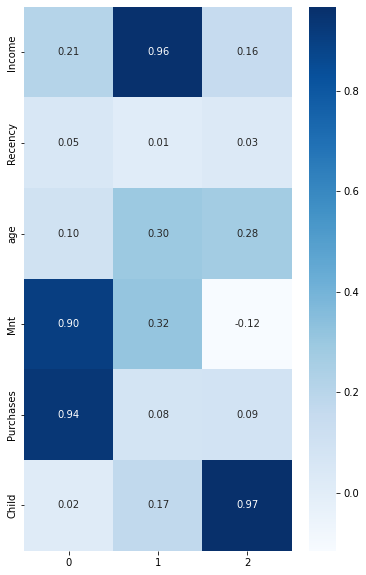

In [48]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

fa 분석결과를 보면 첫번째 요인의 경우 Mnt변수들과 Purchases변수들이 묶여 요인을 거의 설명하는것을 볼 수 있다. 즉, 앞서 PCA와 비슷한 결과라고 판단할 수 있다. 두번째 요인의 경우 십대 자녀의 수와 나이 그리고 소득이 묶여서 대부분을 차지하고 있는것을확인할 수 있다. 이 또한 PCA의 결과와 유사하다.